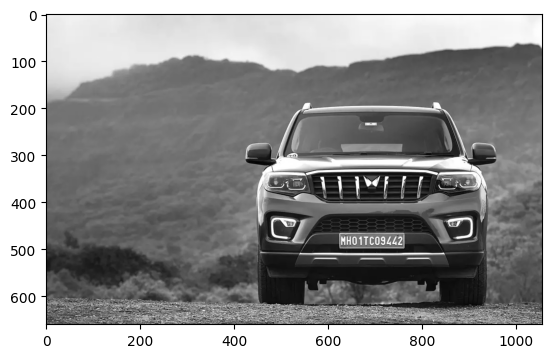

In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import firebase_admin
import time
import re

import easyocr

from firebase_admin import credentials
from firebase_admin import db


img = cv2.imread('scorpio-n-exterior-front-view.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


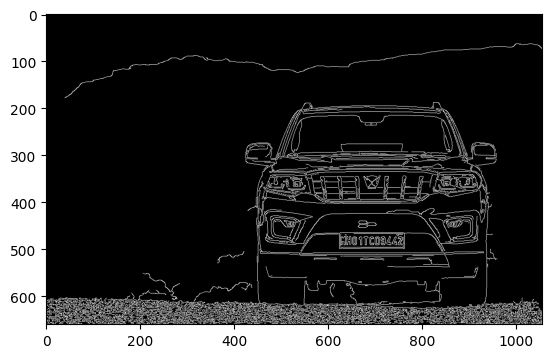

In [32]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
edged = cv2.Canny(bfilter, 30, 200)  # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [33]:
keypoints = cv2.findContours(
    edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
print(location)


[[[624 467]]

 [[761 465]]

 [[763 497]]

 [[626 499]]]


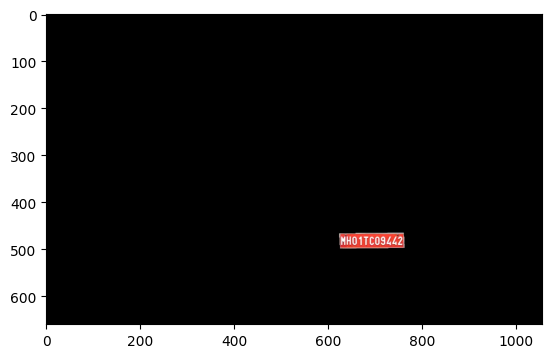

In [34]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


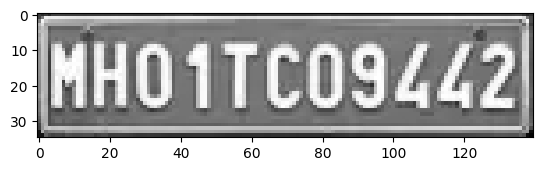

In [35]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [36]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
licNO = result[0][1]
licNOfin = licNO.replace(" ", "")
licNOfin = ''.join(e for e in licNO if e.isalnum())
print(licNOfin)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


MHO1TC09LL2


In [37]:
named_tuple = time.localtime()  # get struct_time
time_string = time.strftime("%m/%d/%Y, %H:%M:%S", named_tuple)
time = time_string.split(", ")
print(time[1])
print(time_string)


09:29:57
04/03/2023, 09:29:57


In [38]:
# cred = credentials.Certificate(
#     'smartparkingsystem-c78d7-firebase-adminsdk-ve90d-0cb385a15f.json')
# firebase_admin = firebase_admin.initialize_app(
#     cred, {'databaseURL': 'https://smartparkingsystem-c78d7-default-rtdb.firebaseio.com/'})

#firebase_admin.delete_app(app=firebase_admin)
ref = db.reference('Users')
print(ref.get())
ref.child(licNOfin).update({
    'Exit Time': time[1]
})


{'SAFD': {'Mobile number': '1223', 'Plate': 'SAFD'}, 'TS08FM8888': {'Entry Time': '09:28:00', 'Exit Time': '09:28:00', 'Mobile number': '1618046883', 'Plate': 'TS08FM8888'}, 'TS08FN8888': {'Mobile number': '1234234', 'Plate': 'TS08FN8888'}}
